## Evaluating scGWAS results when using Pathway Commons v12 vs Pathway Commons v14

In [6]:
library(data.table)
#library(tidyverse)
#library("EnsDb.Hsapiens.v86")
#library(reshape2)
library(R.utils)
library(UpSetR)
library(grid)
library(cowplot)
library(ggnewscale)
library(GGally)

In [73]:
meta_colors_epi <- c("Immature Goblet"="#7D86Ba", "Goblet"="#BC79AC", 
                 "TA 1"="#4A69A5",  "TA 2"="#629F3F", 
                 "Cycling TA"="#6A2A81",  "Secretory TA"="#CA7953",
                 "Immature Enterocytes 1"="#C46A1F", "Immature Enterocytes 2"="#D2D05D", 
                 "Enteroendocrine"="#272727", "Enterocyte Progenitors"="#7f4521", 
                 "Best4+ Enterocytes"="#79B193", "Enterocytes"="#A7C6E6", 
                 "Stem"="#B01C20","Tuft"="#9DBF4A", 
                 "M cells"="#878787")
meta_colors_epi_clean <- c("Immature Goblet"="#7D86Ba", "Goblet"="#BC79AC", 
                 "Cycling TA"="#6A2A81",  "Secretory TA"="#CA7953","TA 1"="#4A69A5",  "TA 2"="#629F3F", 
                 "Immature Enterocytes 1"="#C46A1F", "Immature Enterocytes 2"="#D2D05D", 
                 "Enteroendocrine"="#272727", "Enterocyte Progenitors"="#7f4521", 
                 "Best4+ Enterocytes"="#79B193", "Enterocytes"="#A7C6E6", 
                 "Stem"="#B01C20","Tuft"="#9DBF4A", 
                 "M cells"="#878787")
meta_colors_fib <- c('WNT2B+ Fos-lo 1'='#4b67a3', 'WNT2B+ Fos-lo 2'='#66a141', 
                   'WNT2B+ Fos-hi'='#ae1e24', 
                   'WNT5B+ 1'='#c7661c', 'WNT5B+ 2'='#d2d35b', 
                   'Myofibroblasts'='#a5c3e2', 'RSPO3+'='#6f3b85', 
                   'Inflammatory Fibroblasts'='#7d492a')
meta_colors_b <- c("Plasma" = "#A6CEE3", "Cycling B" = "#B2DF8A", 
                   "Follicular" = "#FF7F00", "GC" = "#1F78B4")

meta_colors_t <- c("MT-hi" = "#A6CEE3", "Cycling T" = "#1F78B4", 
                 "NKs" = "#B2DF8A", "ILCs" = "#33A02C", 
                 "CD8+ IELs" = "#FB9A99", "CD8+ LP" = "#E31A1C", 
                 "CD8+ IL17+" = "#FDBF6F", 
                 "CD4+ Activated Fos-hi" = "#CAB2D6", "CD4+ Activated Fos-lo" = "#6A3D9A", 
                 "CD4+ Memory" = "#FFFF99", "CD4+ PD1+" = "#B15928", 
                 "Tregs" = "#B3E2CD")

meta_colors_my <- c("Macrophages" = "#A6CEE3", "DC1" = "#1F78B4", 
                 "DC2" = "#B2DF8A", "CD69+ Mast" = "#33A02C", 
                 "CD69- Mast" = "#FB9A99", "Cycling Monocytes" = "#E31A1C", 
                 "Inflammatory Monocytes" = "#FDBF6F")

meta_colors_end <- c("Endothelial" = "#868686", 
                     "Microvascular" = "#78b392",
                     "Post-capillary Venules" = "#c97b51", 
                     "Pericytes" = "#7f87bc")
meta_colors_glia <- c("Glia"="#ba79a9")

meta_colors_my_clean <- c("DC1" = "#1F78B4", 
                 "DC2" = "#B2DF8A", "CD69+ Mast" = "#33A02C", 
                 "CD69- Mast" = "#FB9A99", "Cycling Monocytes" = "#E31A1C", 
                 "Inflammatory Monocytes" = "#FDBF6F")


meta_colors_glia <- c("Glia"="#ba79a9")
meta_colors <- c(meta_colors_epi, meta_colors_fib, meta_colors_end, meta_colors_glia, 
                 meta_colors_b, meta_colors_t, meta_colors_my)
meta_colors_clean <- c(meta_colors_epi_clean, meta_colors_fib, 
                 meta_colors_b, meta_colors_t, meta_colors_my_clean)

meta_colors <- c(meta_colors_epi, meta_colors_fib, meta_colors_end, meta_colors_glia, 
                 meta_colors_b, meta_colors_t, meta_colors_my)


In [74]:
meta_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)
meta_colors1_clean <- list(meta_colors_epi_clean, meta_colors_fib, 
                     meta_colors_b, meta_colors_my_clean,
                    meta_colors_t)

In [75]:
exp_epi <- c("Immature Goblet"="white", "Goblet"="#fd8d3c", 
                 "TA 1"="#fdbe85",  "TA 2"="#fdbe85", 
                 "Cycling TA"="#fdbe85",  "Secretory TA"="#fdbe85",
                 "Immature Enterocytes 1"="white", "Immature Enterocytes 2"="white", 
                 "Enteroendocrine"="white", "Enterocyte Progenitors"="white", 
                 "Best4+ Enterocytes"="#fd8d3c", "Enterocytes"="white", 
                 "Stem"="#fdbe85","Tuft"="#fd8d3c", 
                 "M cells"="#fd8d3c")
exp_epi_clean <- c("Immature Goblet"="white", "Goblet"="#fd8d3c", 
                 "Cycling TA"="#fdbe85",  "Secretory TA"="#fdbe85","TA 1"="#fdbe85",  "TA 2"="#fdbe85", 
                 "Immature Enterocytes 1"="white", "Immature Enterocytes 2"="white", 
                 "Enteroendocrine"="white", "Enterocyte Progenitors"="white", 
                 "Best4+ Enterocytes"="#fd8d3c", "Enterocytes"="white", 
                 "Stem"="#fdbe85","Tuft"="#fd8d3c", 
                 "M cells"="#fd8d3c")
exp_fib <- c('WNT2B+ Fos-lo 1'='#fdbe85', 'WNT2B+ Fos-lo 2'='#fdbe85', 
                   'WNT2B+ Fos-hi'='#fdbe85', 
                   'WNT5B+ 1'='white', 'WNT5B+ 2'='white', 
                   'Myofibroblasts'='white', 'RSPO3+'='white', 
                   'Inflammatory Fibroblasts'='#fd8d3c')
exp_b <- c("Plasma" = "#fd8d3c", "Cycling B" = "white", 
                   "Follicular" = "white", "GC" = "white")

exp_t <- c("MT-hi" = "white", "Cycling T" = "white", 
                 "NKs" = "white", "ILCs" = "#fdbe85", 
                 "CD8+ IELs" = "white", "CD8+ LP" = "white", 
                 "CD8+ IL17+" = "#fd8d3c", 
                 "CD4+ Activated Fos-hi" = "white", "CD4+ Activated Fos-lo" = "white", 
                 "CD4+ Memory" = "white", "CD4+ PD1+" = "white", 
                 "Tregs" = "#fdbe85")

exp_my <- c("Macrophages" = "white", "DC1" = "white", 
                 "DC2" = "white", "CD69+ Mast" = "white", 
                 "CD69- Mast" = "white", "Cycling Monocytes" = "white", 
                 "Inflammatory Monocytes" = "#fd8d3c")

exp_my_clean <- c("DC1" = "white", 
                 "DC2" = "white", "CD69+ Mast" = "white", 
                 "CD69- Mast" = "white", "Cycling Monocytes" = "white", 
                 "Inflammatory Monocytes" = "#fd8d3c")

exp_end <- c("Endothelial" = "white", 
                     "Microvascular" = "white",
                     "Post-capillary Venules" = "white", 
                     "Pericytes" = "white")
exp_glia <- c("Glia"="white")
exp_colors <- c(exp_epi, exp_fib, exp_end, exp_glia, 
                 exp_b, exp_t, exp_my)
exp_colors_clean <- c(exp_epi_clean, exp_fib, 
                 exp_b, exp_t, exp_my_clean)

exp_colors1 <- list(meta_colors_epi, meta_colors_glia, 
                     meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_my,
                    meta_colors_t)

exp_colors1_clean <- list(meta_colors_epi_clean, meta_colors_fib, 
                     meta_colors_b, exp_my_clean,
                    meta_colors_t)

## Large scale cell types

In [76]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/UC/10kb/"
scgwas_old <- fread(paste0(scgwas_dir, "UC_celltypes.sig_module.txt"))
scgwas_new <- fread(paste0(scgwas_dir, "UC_celltypes_newpath.sig_module.txt"))

scgwas_old_macro_count <- data.frame(table(scgwas_old$cell_type))
scgwas_new_macro_count <- data.frame(table(scgwas_new$cell_type))
scgwas_old_macro_count
scgwas_new_macro_count

Var1,Freq
<fct>,<int>
Epithelial,1


Var1,Freq
<fct>,<int>
Epithelial,1


In [77]:
# add cell type to Macro
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/Simile_UC/"
meta_data <- readRDS(paste0(dir, "meta_qc_ulcerative_colitis_gut_celltypes_covariates_2023_06_08.rds"))
unique(meta_data$macro)


[1] "Epithelial"  "Fibroblast"  "Endothelial" "Glia"        "B_cell"     
[6] "T_cell"      "Myeloid"

In [78]:
scgwas_macro_old_graph <- scgwas_old[,c("cell_type", "module_score_z")]
scgwas_macro_old_graph


scgwas_macro_new_graph <- scgwas_new[,c("cell_type", "module_score_z")]
scgwas_macro_new_graph
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$macro), scgwas_old$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$macro), scgwas_old$cell_type)))))

scgwas_macro_old_graph <- rbind(scgwas_macro_old_graph, add_df)    


# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$macro), scgwas_new$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$macro), scgwas_new$cell_type)))))

scgwas_macro_new_graph <- rbind(scgwas_macro_new_graph, add_df) 




cell_type,module_score_z
<chr>,<dbl>
Epithelial,3.173368


cell_type,module_score_z
<chr>,<dbl>
Epithelial,2.439931


In [79]:
scgwas_macro_new_graph

cell_type,module_score_z
<chr>,<dbl>
Epithelial,2.439931
Fibroblast,0.000000
Endothelial,0.000000
Glia,0.000000
B_cell,0.000000
T_cell,0.000000
Myeloid,0.000000


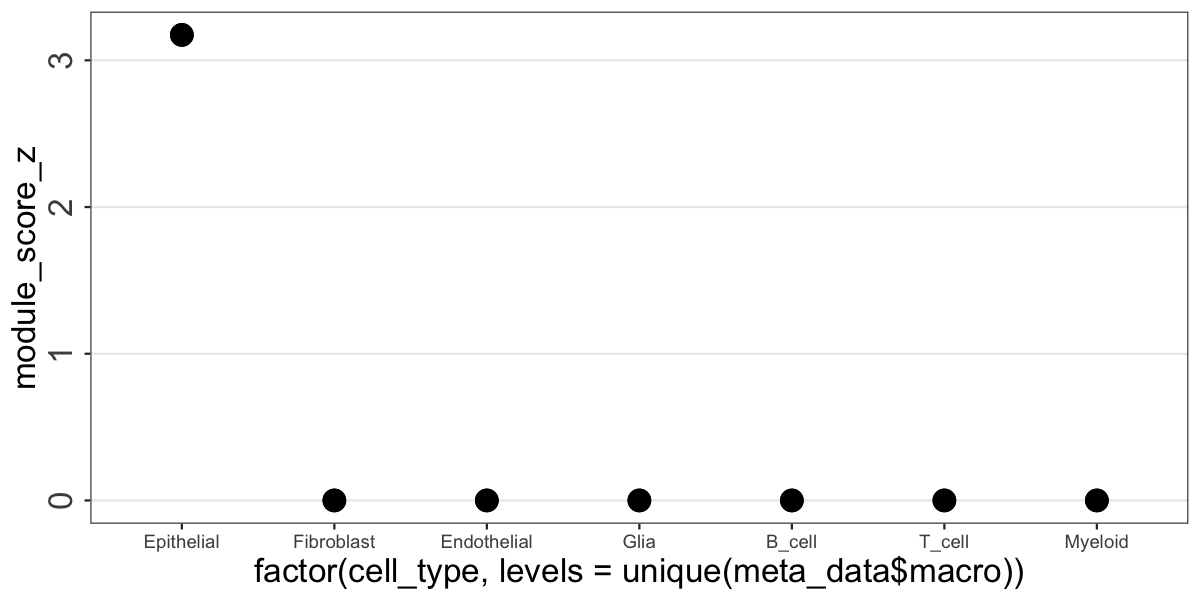

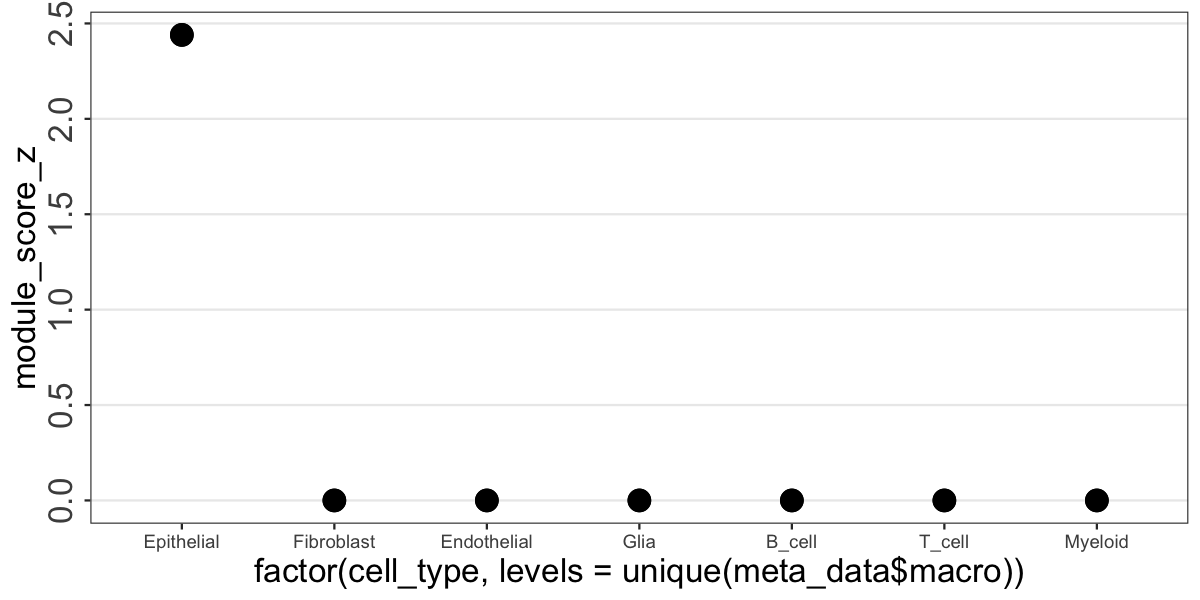

In [80]:

options(repr.plot.height = 5, repr.plot.width =10 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_macro_old_graph, aes(x=factor(cell_type, levels=unique(meta_data$macro)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      #axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  

ggplot(scgwas_macro_new_graph, aes(x=factor(cell_type, levels=unique(meta_data$macro)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      #axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

## Finer-grained cell states

In [81]:
# 10kb
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/UC/10kb/"
scgwas_micro_old_10 <- fread(paste0(scgwas_dir, "UC_clusters.sig_module.txt"))
scgwas_micro_new_10 <- fread(paste0(scgwas_dir, "UC_clusters_newpath.sig_module.txt"))

# create a table with the number of groups for each cell_type
scgwas_micro_old_count_10 <- data.frame(table(scgwas_micro_old_10$cell_type))
scgwas_micro_new_count_10 <- data.frame(table(scgwas_micro_new_10$cell_type))


setdiff(scgwas_micro_old_count_10$Var1, meta_data$cluster)
setdiff(scgwas_micro_new_count_10$Var1, meta_data$cluster)

character(0)

character(0)

In [82]:
sig_celltypes_10 = union(scgwas_micro_old_10$cell_type, scgwas_micro_new_10$cell_type)


# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes_10, scgwas_micro_old_count_10$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes_10, scgwas_micro_old_count_10$Var1)))))

scgwas_micro_old_count_10 <- rbind(scgwas_micro_old_count_10, add_df)    

# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes_10, scgwas_micro_new_count_10$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes_10, scgwas_micro_new_count_10$Var1)))))

scgwas_micro_new_count_10 <- rbind(scgwas_micro_new_count_10, add_df) 


In [83]:
# ensure names are correct
setdiff(scgwas_micro_old_count_10$Var1, names(meta_colors_clean))
length(setdiff(scgwas_micro_old_count_10$Var1, names(meta_colors_clean)))
length(setdiff(scgwas_micro_new_count_10$Var1, names(meta_colors_clean)))
length(setdiff(scgwas_micro_old_10$cell_type, names(meta_colors_clean)))
length(setdiff(scgwas_micro_new_10$cell_type, names(meta_colors_clean)))

character(0)

[1] 0

[1] 0

[1] 0

[1] 0

In [84]:
colnames(meta_data)

[1] "cell"         "sample"       "disease"      "cell_type"    "cluster"     
 [6] "nGene"        "nUMI"         "percent_mito" "macro"        "Gender"      
[11] "Location"     "Smoking"

In [85]:
scgwas_micro_old_graph_10 <- scgwas_micro_old_10[,c("cell_type", "module_score_z")]
scgwas_micro_new_graph_10 <- scgwas_micro_new_10[,c("cell_type", "module_score_z")]




# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors_clean), scgwas_micro_old_10$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors_clean), scgwas_micro_old_10$cell_type)))))

scgwas_micro_old_graph_10 <- rbind(scgwas_micro_old_graph_10, add_df)    

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors_clean), scgwas_micro_new_10$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors_clean), scgwas_micro_new_10$cell_type)))))

scgwas_micro_new_graph_10 <- rbind(scgwas_micro_new_graph_10, add_df) 




#### Get ranked colors

In [90]:
output_dir <- "/Users/hopekirby/Downloads/scpgwas/scdrs/10kb/"
micro_table <- fread(paste0(output_dir, "UC.scdrs_group.cell_type"))
micro_table[1:2,]
ranked_cell_clusters <- c()
for (cell_type in meta_colors1_clean) {
    # get the ranked cells in that group
    data <- micro_table[micro_table$group %in% names(cell_type),]
    data <- data[order(assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Best4+ Enterocytes,1609,1000,0.3356643,0.2761121,0.050949052,1.726937,0,0,0
CD4+ Activated Fos-hi,8498,1000,0.2787213,0.5499340,0.004995005,3.923515,0,0,1


[1] "Tuft"                     "Enteroendocrine"         
 [3] "TA 1"                     "Best4+ Enterocytes"      
 [5] "Stem"                     "Goblet"                  
 [7] "Immature Goblet"          "Cycling TA"              
 [9] "Enterocyte Progenitors"   "Secretory TA"            
[11] "Immature Enterocytes 1"   "TA 2"                    
[13] "Immature Enterocytes 2"   "Enterocytes"             
[15] "M cells"                  "WNT2B+ Fos-lo 2"         
[17] "RSPO3+"                   "WNT2B+ Fos-lo 1"         
[19] "WNT2B+ Fos-hi"            "Myofibroblasts"          
[21] "WNT5B+ 2"                 "WNT5B+ 1"                
[23] "Inflammatory Fibroblasts" "Cycling B"               
[25] "GC"                       "Follicular"              
[27] "Plasma"                   "CD69- Mast"              
[29] "CD69+ Mast"               "DC1"                     
[31] "Inflammatory Monocytes"   "DC2"                     
[33] "Cycling Monocytes"        "CD8+ IELs"               
[35] "MT-hi"                    "CD8+ LP"                 
[37] "CD4+ PD1+"                "CD4+ Memory"             
[39] "NKs"                      "CD4+ Activated Fos-lo"   
[41] "CD4+ Activated Fos-hi"    "Cycling T"               
[43] "ILCs"                     "CD8+ IL17+"              
[45] "Tregs"

In [91]:
length(sig_celltypes_10)
sig_celltypes_10
# get the same order as the meta_colors
sig_celltypes_10 = intersect(ranked_cell_clusters, sig_celltypes_10)
length(sig_celltypes_10)

[1] 11

[1] "Best4+ Enterocytes"     "Cycling TA"             "Enterocyte Progenitors"
 [4] "Enteroendocrine"        "Immature Enterocytes 2" "Immature Goblet"       
 [7] "M cells"                "Secretory TA"           "TA 1"                  
[10] "Stem"                   "TA 2"

[1] 11

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


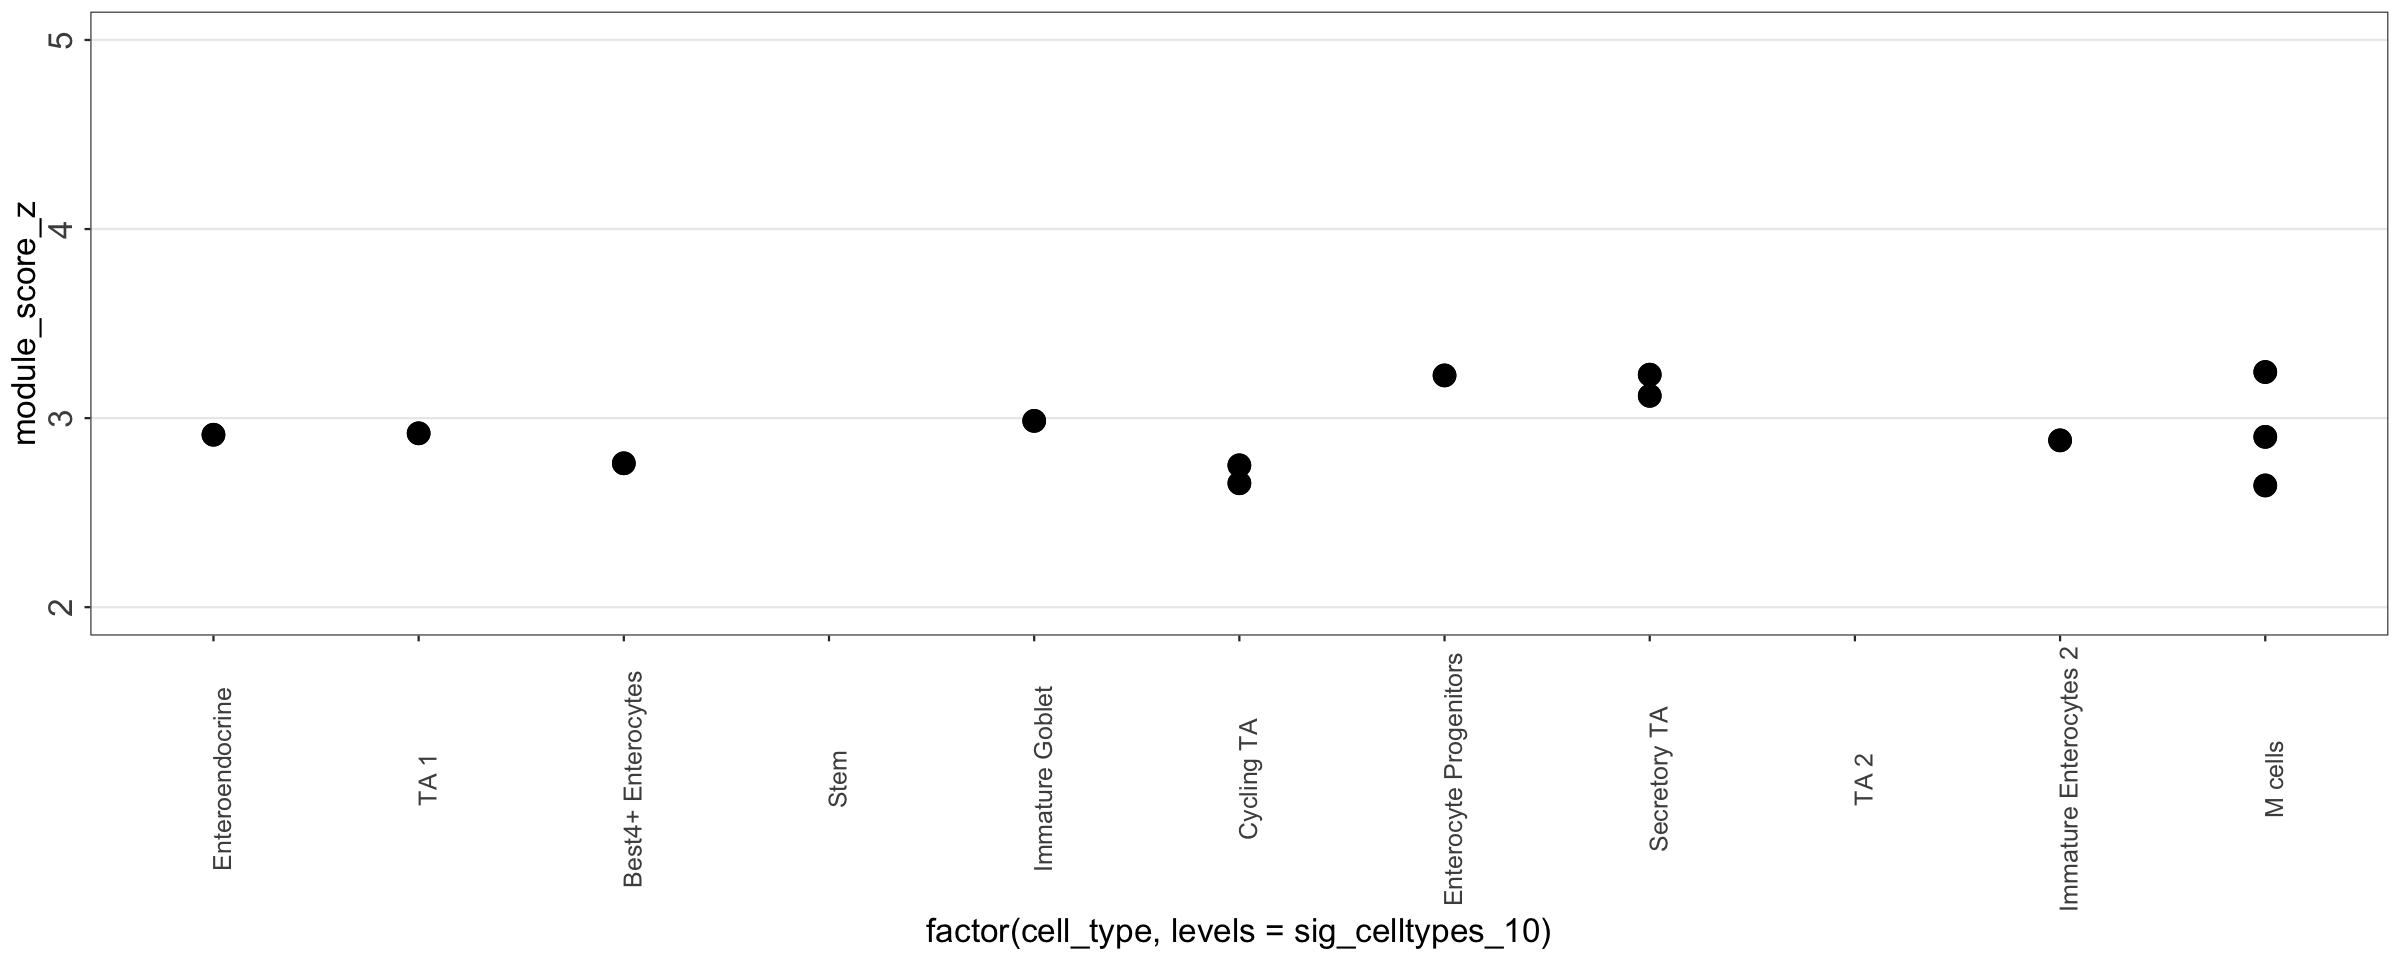

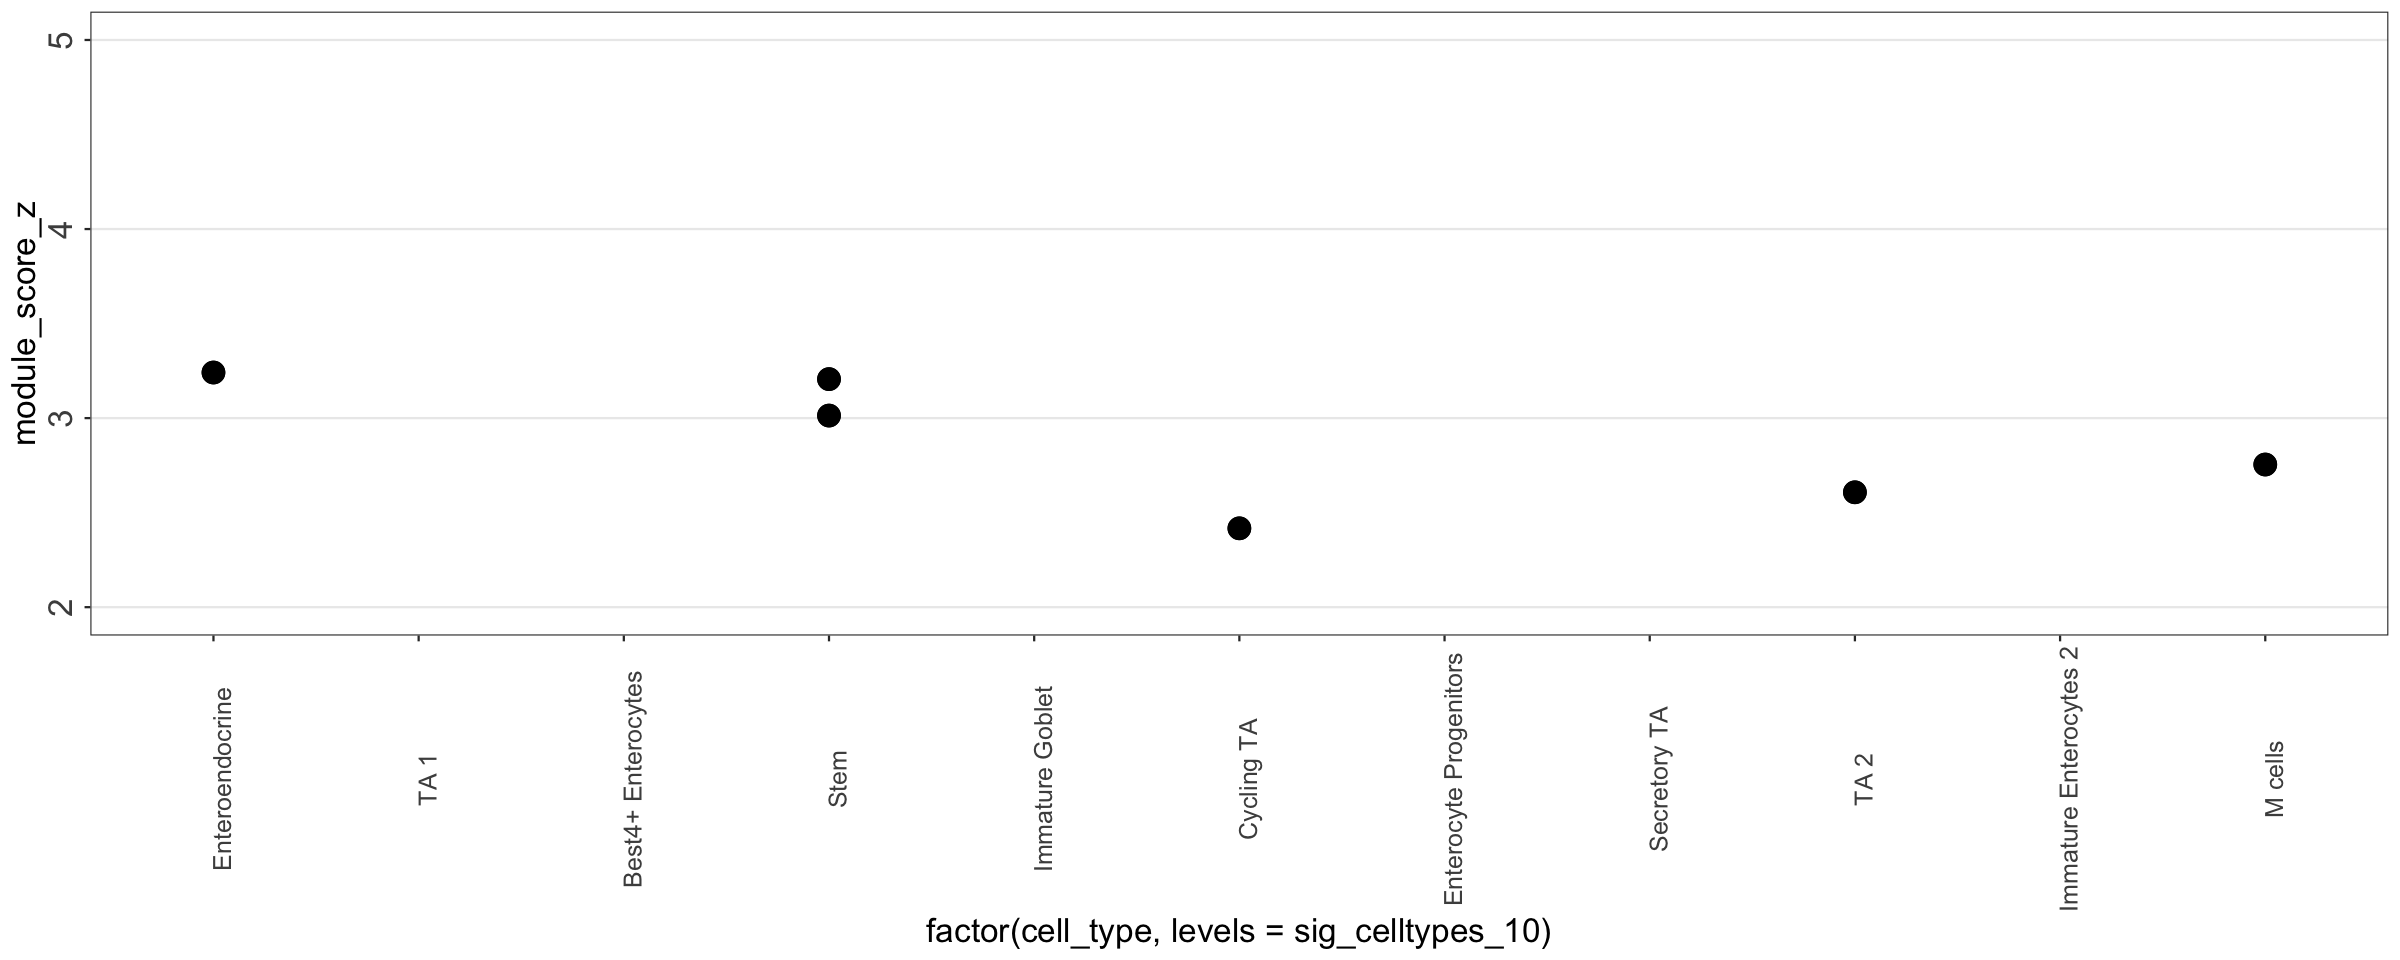

In [92]:

options(repr.plot.height = 8, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_micro_old_graph_10[scgwas_micro_old_graph_10$cell_type %in% sig_celltypes_10,], aes(x=factor(cell_type, levels=sig_celltypes_10), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2, 5)

ggplot(scgwas_micro_new_graph_10[scgwas_micro_new_graph_10$cell_type %in% sig_celltypes_10,], aes(x=factor(cell_type, levels=sig_celltypes_10), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin())) + ylim(2, 5)
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

## Do based on number of gene modules  now

In [93]:
print("10kb")
unique(scgwas_micro_new_count_10$Freq)
unique(scgwas_micro_old_count_10$Freq)
sort(union(unique(scgwas_micro_new_count_10$Freq),
unique(scgwas_micro_old_count_10$Freq)))

[1] "10kb"


[1] 1 2 0

[1] 1 2 3 0

[1] 0 1 2 3

In [94]:
# for each, get the maximum module Z score
max_scores = c()
for (group in scgwas_micro_old_count_10$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_old_10[scgwas_micro_old_10$cell_type == group,]
    if (nrow(filt) == 0) {
        print(group)
        max_scores = c(max_scores, 0)
        }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
length(max_scores)
dim(scgwas_micro_old_count_10)
scgwas_micro_old_count_10$Max_Zscore = max_scores


max_scores = c()
for (group in scgwas_micro_new_count_10$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_new_10[scgwas_micro_new_10$cell_type == group,]
    if (nrow(filt) == 0) {
        max_scores = c(max_scores, 0)
        }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
scgwas_micro_new_count_10$Max_Zscore = max_scores

[1] "Stem"
[1] "TA 2"


[1] 11

[1] 11  2

In [95]:
scgwas_micro_old_count_10[1:2,]

,Var1,Freq,Max_Zscore
,<fct>,<dbl>,<dbl>
1,Best4+ Enterocytes,1,2.761032
2,Cycling TA,2,2.750313


In [96]:
library(RColorBrewer)
brewer.pal(6, "YlGnBu")
backup_colors=c("1"='#FFFFD9', "2"='#EDF8B1', "3"='#C7E9B4', 
                "4"='#7FCDBB', "5"="#41B6C4", "6"="#1D91C0", 
                "7"='#7FCDBB',  "9"='#253494', "11"='#081D58', "0"="white")
backup_colors_10=c("1"='#FFFFCC', "2"='#C7E9B4', "3"='#7FCDBB', 
                "4"='#41B6C4', "5"='#2C7FB8', "6"='#253494', "0"="white")


[1] "#FFFFCC" "#C7E9B4" "#7FCDBB" "#41B6C4" "#2C7FB8" "#253494"

In [97]:
scgwas_micro_old_count_10[1:2,]
setdiff(scgwas_micro_old_count_10$Var1, names(exp_colors_clean))

,Var1,Freq,Max_Zscore
,<fct>,<dbl>,<dbl>
1,Best4+ Enterocytes,1,2.761032
2,Cycling TA,2,2.750313


character(0)

In [98]:
dim(filt)
dim(scgwas_micro_old_count_10[scgwas_micro_old_count_10$Max_Zscore !=0,])

[1]  0 15

[1] 9 3

In [99]:
setdiff(sig_celltypes_10, scgwas_micro_old_count_10$Var1)
setdiff(scgwas_micro_old_count_10$Var1, sig_celltypes_10)

character(0)

character(0)

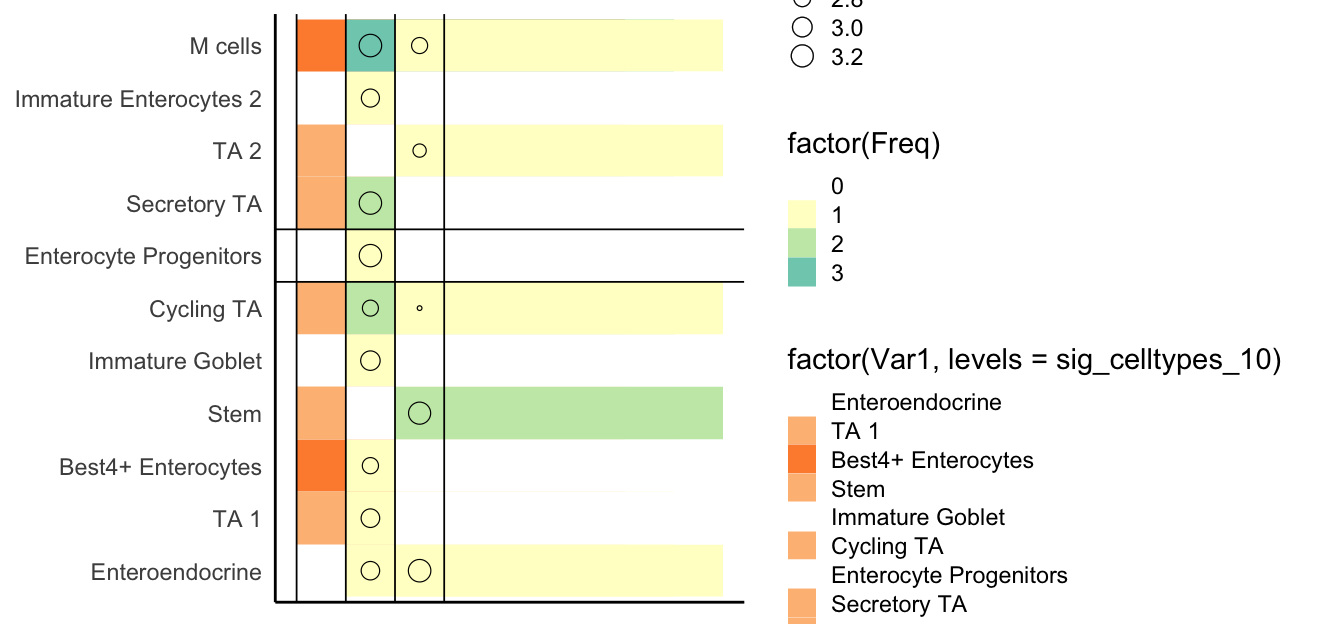

In [127]:
library(ggplot2)
library(ggnewscale)
options(repr.plot.height = 0.473098330241187*length(sig_celltypes_10), repr.plot.width =11)
white_list = c("")


filt = scgwas_micro_old_count_10[scgwas_micro_old_count_10$Max_Zscore !=0,]
p1 <- ggplot(scgwas_micro_old_count_10) + 
  # First layer: discrete fill
  geom_tile(aes(x=0, y=factor(Var1, levels=sig_celltypes_10), fill=factor(Var1, levels=sig_celltypes_10))) +
  scale_fill_manual(values=exp_colors_clean) + 
  new_scale("fill") + 
  
  # Second layer: continuous fill
  geom_tile(aes(fill=factor(Freq), x=0.15, y=Var1 )) + 
geom_point(data=filt[!filt$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
geom_point(data=filt[filt$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='white', fill='white', shape=1) +
  scale_fill_manual(values = backup_colors_10) +


# NEW
geom_tile(data=scgwas_micro_new_count_10, aes(x=0.3, y=factor(Var1, levels=sig_celltypes_10), fill=factor(Freq))) +
geom_point(data=scgwas_micro_new_count_10[scgwas_micro_new_count_10$Max_Zscore != 0,], aes(x=-.125, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
    geom_vline(xintercept=-0.35) + geom_vline(xintercept=-0.5) +geom_vline(xintercept=-0.2) +
    geom_vline(xintercept=-0.05) +

geom_hline(yintercept=6.5) + geom_hline(yintercept=7.5) + geom_hline(yintercept=12.5) +
  # Theme settings
theme_classic(base_size =17.5) + 
  theme(#legend.position="none", 
        axis.text.x = element_blank(),
        axis.title.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.x = element_blank())
p1

In [128]:
#options(repr.plot.height = 0.473098330241187*nrow(micro_0), repr.plot.width =11)
pdf("./UC_scGWAS_path_10kb.pdf", width=11, height=0.473098330241187*length(sig_celltypes_10))
print(p1)
dev.off() 

pdf 
  2

### Compare the list of genes found significant

In [106]:
length(sig_celltypes_10)

[1] 11

In [109]:
# have each cell type: genes for scgwas
ra_cell_gene_dict_old = list()
ra_cell_cluster_list_old = list()
ra_cell_gene_list_old = list()

ra_cell_gene_dict_new = list()
ra_cell_cluster_list_new = list()
ra_cell_gene_list_new = list()


for (cluster in sig_celltypes_10) {
    # get only the gene modules for cell type OLD
    filtered <- scgwas_micro_old_10[scgwas_micro_old_10$cell_type == cluster,]
    ra_cell_gene_dict_old[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_old <- append(ra_cell_cluster_list_old, cluster)
    ra_cell_gene_list_old <- append(ra_cell_gene_list_old, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    # get only the gene modules for cell type NEW
    filtered <- scgwas_micro_new_10[scgwas_micro_new_10$cell_type == cluster,]
    ra_cell_gene_dict_new[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_new <- append(ra_cell_cluster_list_new, cluster)
    ra_cell_gene_list_new <- append(ra_cell_gene_list_new, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
ra_cell_gene_dict_new[cluster]
ra_cell_gene_dict_old[cluster]

$`M cells`
[1] "CLDN3"  "CLDN4"  "FXYD3"  "PARK7"  "SERBP1" "ABCF3"

$`M cells`
 [1] "CLDN3"    "CLDN4"    "FXYD3"    "PARK7"    "SERBP1"   "CLDN3"   
 [7] "CLDN4"    "PARK7"    "TALDO1"   "CLDN3"    "CLDN4"    "PARK7"   
[13] "ZNF511"   "HMGA1"    "C1orf174"

In [110]:
# read in pathway files
path_v14 = fread("~/Desktop/SCRNA-GWAS-Benchmarking/data//Pathway/PathwayCommons14.All.hgnc.exPCDHA.MHC.NCBI38.tsv", header=FALSE)
path_v12 = fread("~/Downloads/PathwayCommons12.All.hgnc.exPCDHA.MHC.NCBI37.tsv", header=FALSE)
path_v14[1:2]
v14_genes = union(path_v14$V1, path_v14$V2)
v12_genes = union(path_v12$V1, path_v12$V2)
length(v14_genes)
length(v12_genes)
length(intersect(v14_genes, v12_genes))
length(setdiff(v14_genes, v12_genes))
length(setdiff(v12_genes, v14_genes))

V1,V2
<chr>,<chr>
ABCG2,A1BG
ATP7A,A1BG


[1] 17035

[1] 18246

[1] 16475

[1] 560

[1] 1771

In [111]:
new_sig_genes = do.call(c, ra_cell_gene_list_new)
old_sig_genes = do.call(c, ra_cell_gene_list_old)
length(new_sig_genes)
length(old_sig_genes)

# Number of significant genes that are not found in the other pathway file
length(setdiff(new_sig_genes, v12_genes))
length(setdiff(old_sig_genes, v14_genes))
length(setdiff(new_sig_genes, v14_genes))
length(setdiff(old_sig_genes, v12_genes))

[1] 36

[1] 71

[1] 0

[1] 0

[1] 0

[1] 0

In [113]:
# For each cell type, get the # intersections, # only new, and # only old
# For only ones, get the number NOT in the other file

values_list = c()
stats_list = c()
cluster_list = c()

for (cluster in sig_celltypes_10) {
    # get the lists
    v12 = ra_cell_gene_dict_old[[cluster]]
    v14 = ra_cell_gene_dict_new[[cluster]]
    # get the intersection and unique genes of this cluster called under each pathway
    both = intersect(v12, v14)
    v14O = setdiff(v14, v12)
    v12O = setdiff(v12, v14)
    # get how many of the unique genes are MISSING  in the other pathway file
    v14M = setdiff(v12O, v14_genes)
    v12M = setdiff(v14O, v12_genes)
    stats_list = c(stats_list, "Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M", "v14MPer", "v12MPer")
    values_list = c(values_list, length(both), length(v14O), length(v12O), length(v14M), length(v12M), 
                   round(length(v14M)/length(v12O)*100, 2), round(length(v12M)/length(v14O)*100, 2))
    cluster_list = c(cluster_list, rep(cluster, 7))
    
    }
gene_comp_df = data.table("Cluster"=cluster_list, "Stat"=stats_list, "Value"=values_list)
gene_comp_df[1:5,]

Cluster,Stat,Value
<chr>,<chr>,<dbl>
Enteroendocrine,Both,3
Enteroendocrine,v14 Only,3
Enteroendocrine,v12 Only,1
Enteroendocrine,v14M,0
Enteroendocrine,v12M,0


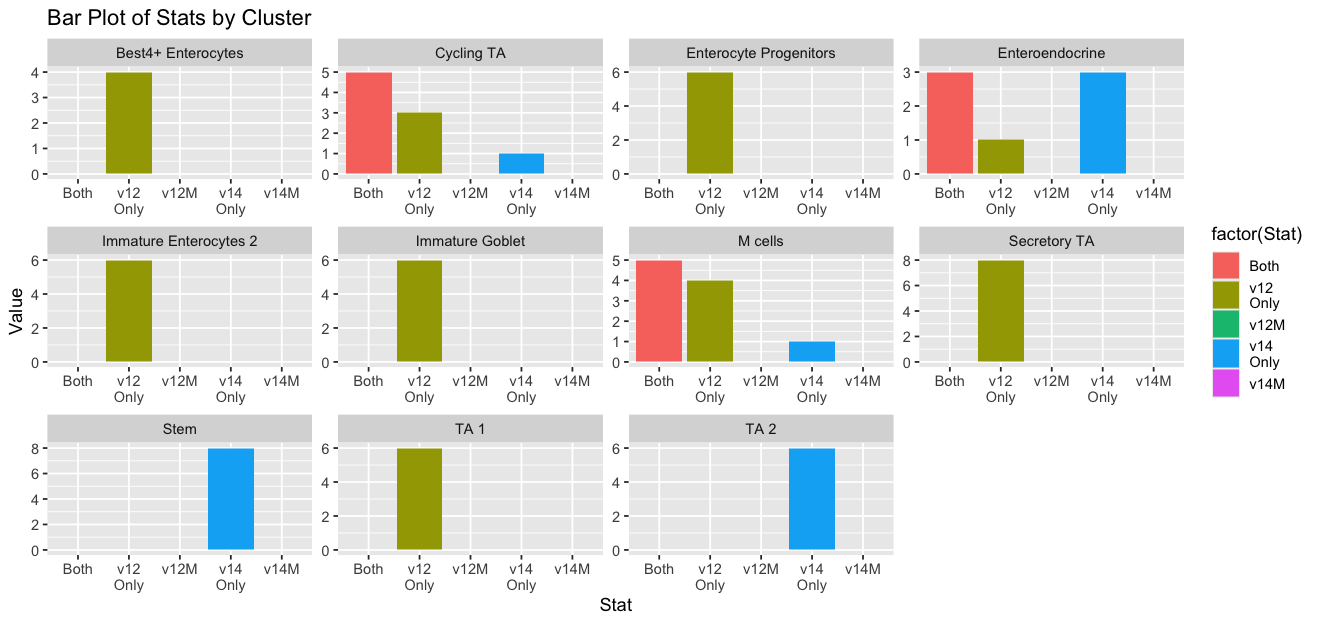

In [114]:

# Create the bar plot
ggplot(gene_comp_df[gene_comp_df$Stat %in% c("Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(title = "Bar Plot of Stats by Cluster",
       x = "Stat",
       y = "Value")    

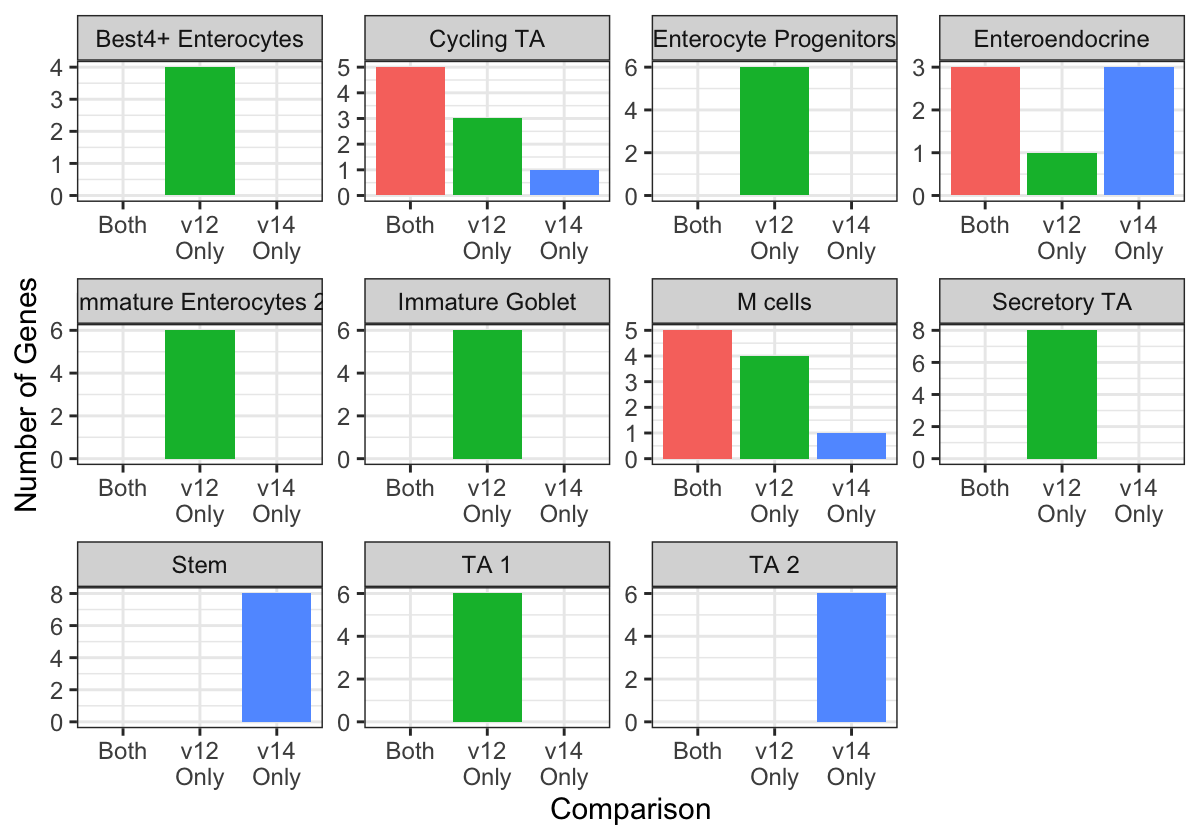

In [125]:
options(repr.plot.height=7, repr.plot.width=10)
# Create the bar plo
ggplot(gene_comp_df[gene_comp_df$Stat %in% c("Both", "v14\nOnly", "v12\nOnly"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(
       x = "Comparison",
       y = "Number of Genes", fill="Comparison")    + theme_bw(base_size=18) + theme(legend.position="None")

In [126]:
ggsave("./UC_scGWAS_Path_GeneComp.png", dpi=300, width=10, height=7)